# Import libraries

In [61]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
import plotly.express as px #for visualization
import plotly.io as pio
pio.renderers.default = "notebook"

import matplotlib.pyplot as plt  #for visualization
import seaborn as sns
import matplotlib as mpl

In [62]:
#Read the dataset
filepath = r"..\Data\BankChurners.csv"
data_df = pd.read_csv(filepath)
#data_df

In [63]:
data_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [64]:
# Deleting the last two columns as dataset owner suggested.

data_df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)


In [65]:
data_df.info()
#print("Summary:", data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [66]:
print('Number of rows: ', data_df.shape[0])
print("\nNumber of features:", data_df.shape[1])
print("\nMissing values:", data_df.isnull().sum().values.sum())
print("\nUnique values:")
print(data_df.nunique())

Number of rows:  10127

Number of features: 20

Missing values: 0

Unique values:
Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64


###  Summarization
There are 17 numerical features:

- CLIENTNUM : Unique identifier for the customer holding the account
- Customer_Age: Customer's Age in Years
- Dependent_count: Number of dependents
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total number of products held by the customer
- Months_Inactive_12_mon: Number of months inactive in the last 12 months
- Contacts_Count_12_mon: Number of Contacts in the last 12 months
- Credit_Limit:  Credit Limit on the Credit Card
- Total_Revolving_Bal: The unpaid portion that carries over to the next month when a customer does not pay
- Avg_Open_To_Buy: The average credit available allocated to a specific customer. (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Measures how much credit you are using compared to how much you have available.


There are 17 categorical features:

- Attrition_Flag: Whether the customer is "Existing Customer" or "Attrited Customer" 
- Gender: Whether the customer is a M or a F
- Education_Level: Whether the customer has 'High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate', 'Doctorate' qualification. 
- Marital_Status: Whether the customer is 'Married' 'Single' 'Unknown' 'Divorced'
- Income_Category: Whether the customer earn '$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +','Unknown'
- Card_Category: Whther the customer hold 'Blue' 'Gold' 'Silver' 'Platinum' card


###  EDA


### Parameter features Impact of Churn

A probabilistic approach is used to investage the features which have a direct impact on the churn instead of correlation. 

- Features are independent if the only difference observed between the histogram plots is in the $y$ counts

- Features are dependent if the distribution over the values are normalized distributed at both plots.

Based on this methodology; the following features are considered having first level impact on churn

- Total_Revolving_Bal

- Total_Trans_Amt

- Toal_Ct_Chang_Q4_Q1

- Total_Amt_Chang_Q4_Q1

- Avg_utilization_Ratio

- Total_Trans_Ct (pretty clear multimode vs unimodal distribution)




In [67]:
cols = list(data_df.columns)
cols

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

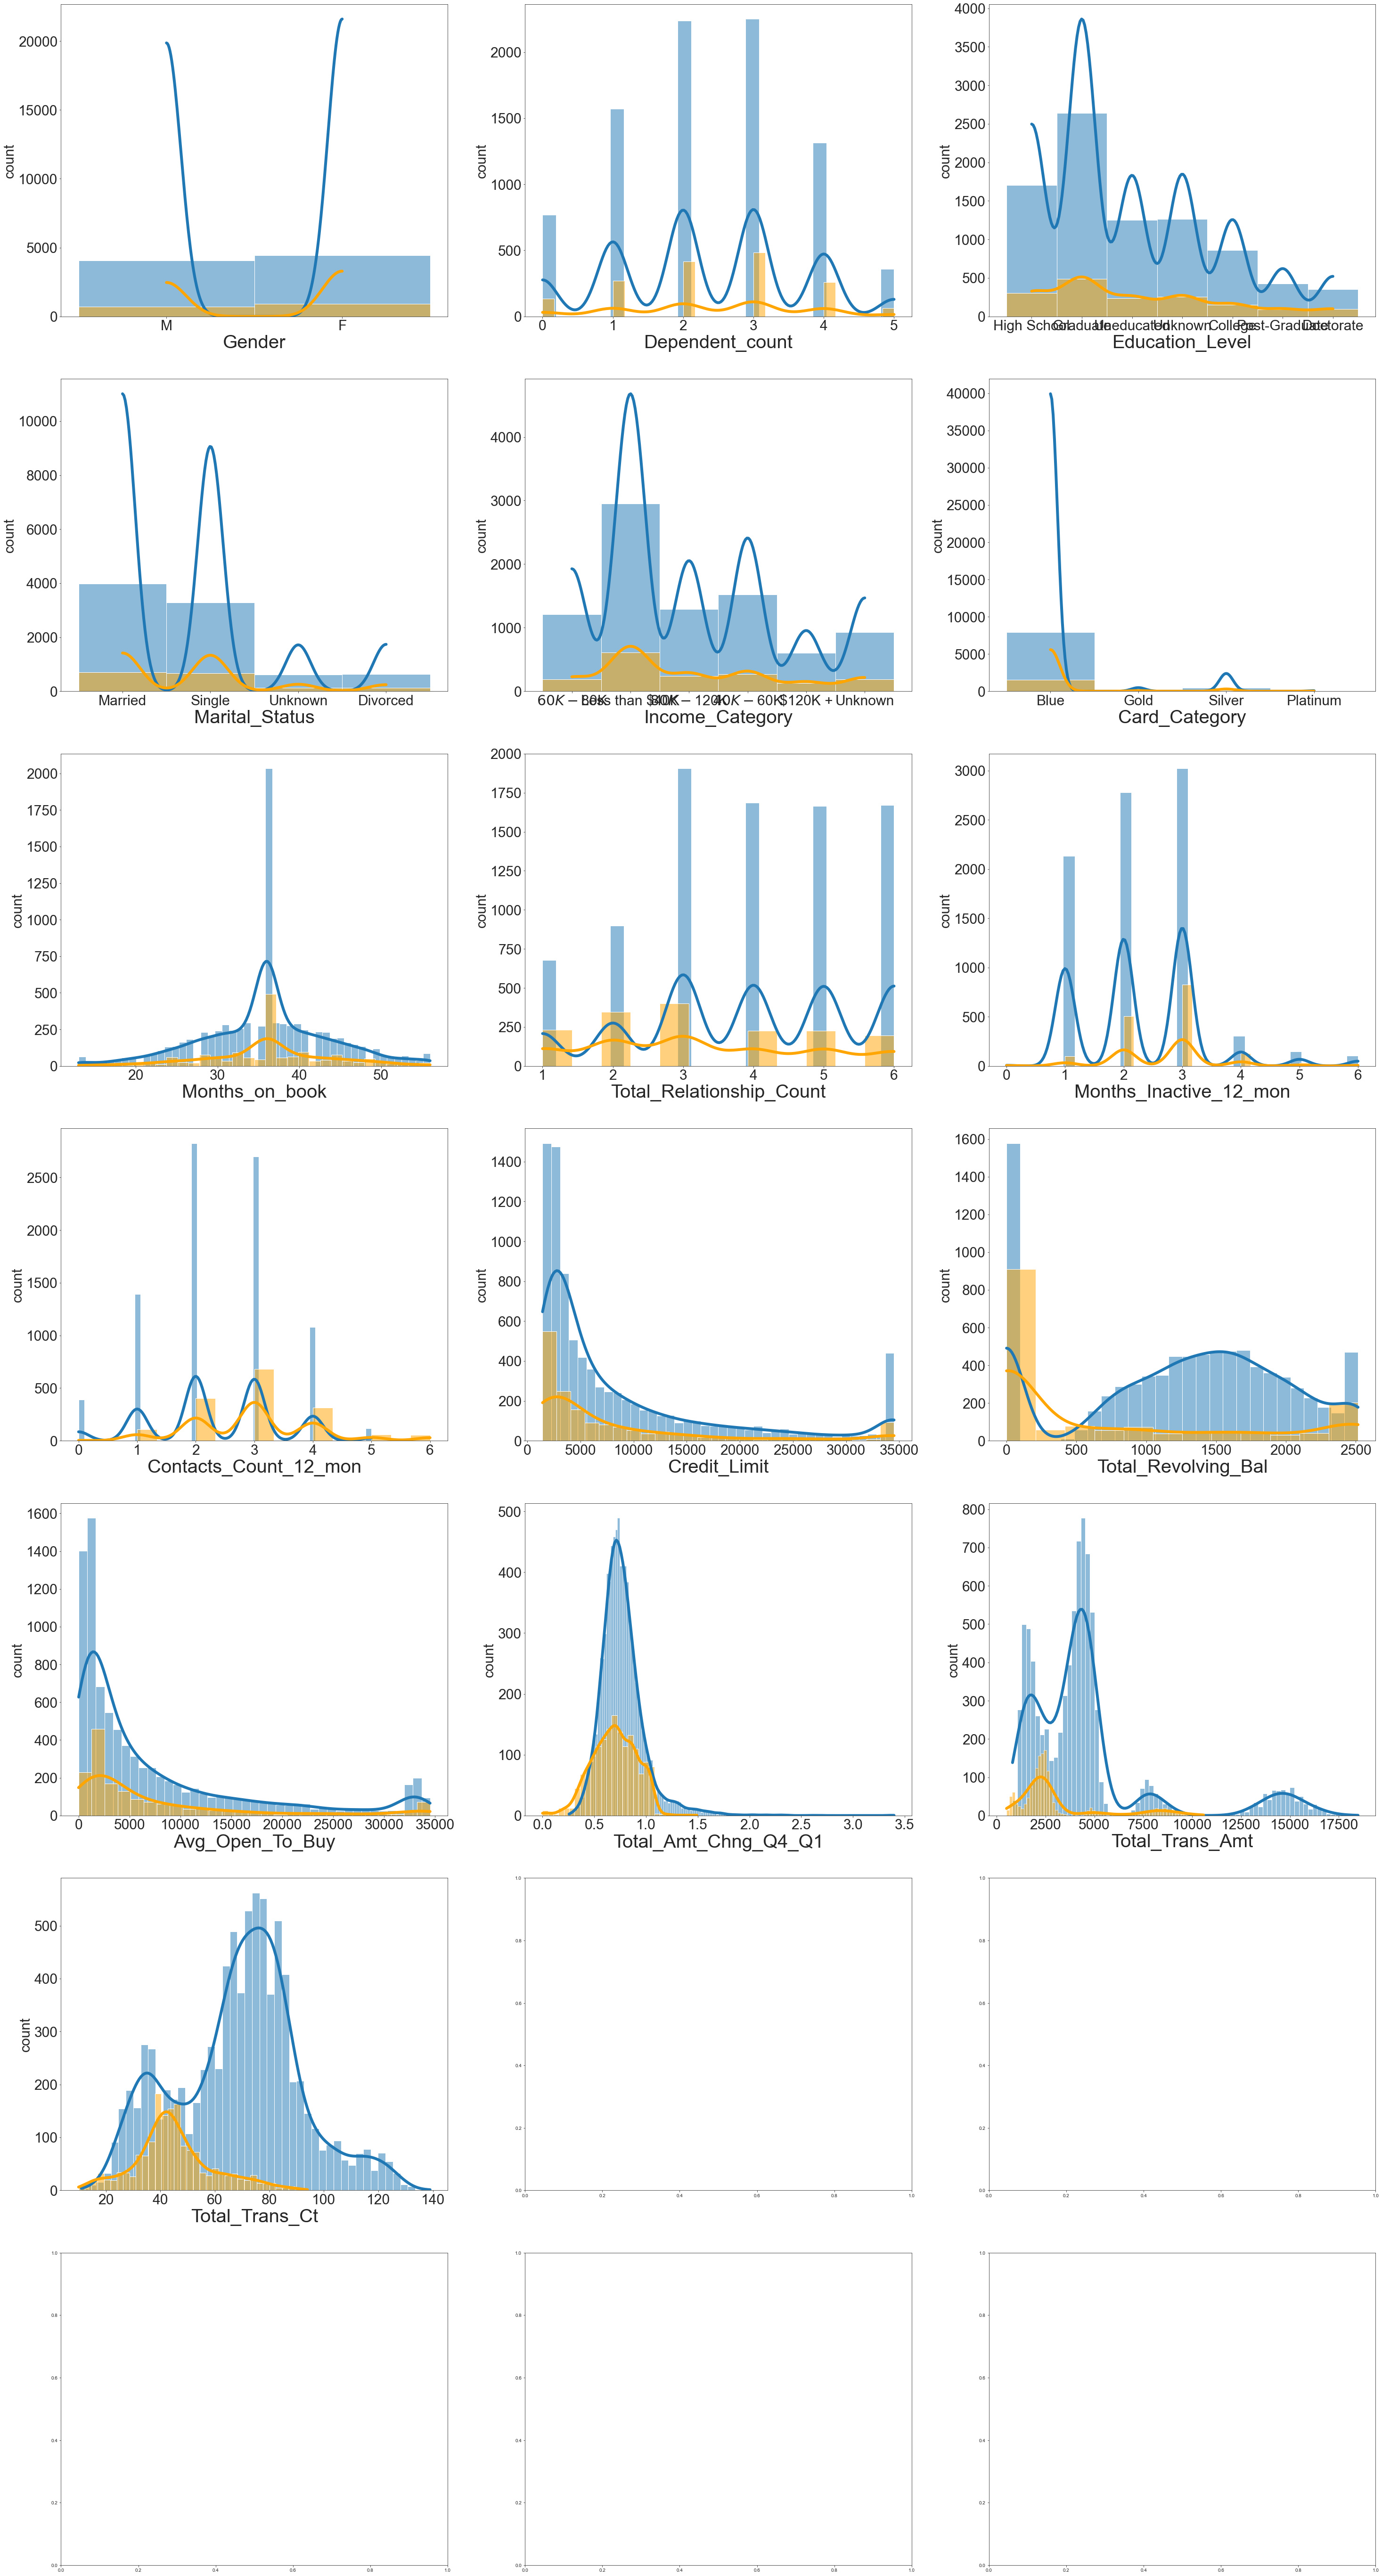

In [68]:
num = 0
fig,axs = plt.subplots(7,3,figsize=(50,100),edgecolor='k')
axs = axs.ravel()
for i in cols[2:-2]:
    sns.set_style('ticks')
    sns.histplot(data_df.loc[data_df['Attrition_Flag']=='Existing Customer' , i], 
                 label = 'Existing', kde = True , 
                 line_kws=dict(linewidth=6), ax = axs[num])
    sns.histplot(data_df.loc[data_df['Attrition_Flag']=='Attrited Customer' , i], 
                 label = 'Attrited', kde = True , 
                 line_kws=dict(linewidth=6), ax = axs[num],color='orange')
    #sns.histplot(df, x=i,hue=cols[1], kde=True,line_kws=dict(linewidth=6),stat = 'probability', ax = axs[num])
    
    plt.setp(axs[num].get_title(), fontsize='25')
    axs[num].set_xlabel(i,fontsize=40)
    axs[num].set_ylabel('count',fontsize=30)
    axs[num].tick_params(axis='both',labelsize = '30')
    num+=1


#### 1.2.1 Summary from Target variable Analysis:

The dataset have imbalanced target
- Existing Customer (Not Churn) :83.93%
- Attrited Customer (Churn): 16.07%

## Data Preprocessing 



In [69]:
# Select numerical variables
numeric = data_df.select_dtypes(exclude=object).columns


# Select categorical variables
categ = data_df.select_dtypes(include=object).columns


### Skew Features

A data is called as skewed when curve appears distorted or skewed either to the left or to the right in a statistical distribution. [Towards Data Science](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37)

consequence: The tail regions of skewes data may act as an outlier for the statistical model, and outlier adversely affect the model performance especially regression based models.

$To Do$: It  necessary to transform the skewed data to something close to the normal distribution using Box-Cox transformation. 

In [70]:
skew_limit = 0.5
skew_vals = data_df[numeric].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061


In [71]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Normalize skewed features
for col in skew_cols.index:
    data_df[col] = boxcox1p(data_df[col], boxcox_normmax(data_df[col] + 1))

c:\Users\masud\Documents\Customer-Churn-Prediction\venv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



### Scaling Feature

This is largely attributed to the different units in which these features were measured and recorded.

MinMaxScaler is the Scikit-learn function for normalisation wiill be used. 

In [72]:
#Scaling features
from sklearn.preprocessing import MinMaxScaler

for col in data_df[numeric]:
    data_df[col] = MinMaxScaler().fit_transform(data_df[[col]])

### Encoding Categorical Features

Tansforming all dataset type into integer or Numeric


In [73]:
# Attrition_flag converted to "0"  and "1"

data_df["Attrition_Flag"] = data_df["Attrition_Flag"].replace(
    {
        'Attrited Customer': 0, 'Existing Customer': 1
        }
)


In [74]:
# Income_Category converted from range of 1 to 5

data_df["Income_Category"] = data_df["Income_Category"].replace(
    {
        'Unknown': 0, 'Less than $40K': 1, 
        '$40K - $60K': 2, '$60K - $80K': 3, 
        '$80K - $120K': 4, '$120K +': 5
    }
)


In [75]:
# #Gender converted to "0" and "1"

data_df["Gender"] = data_df["Gender"].replace(
    {
        'F': 0, 'M': 1
}
)

In [76]:
data_df["Education_Level"] = data_df["Education_Level"].replace(
    {
        'Unknown': 0, 'Uneducated': 1, 'High School': 2,
        'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6
    }
    )

In [77]:
data_df["Marital_Status"] = data_df["Marital_Status"].replace(
    {
       'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3 
    }
)

In [78]:
data_df["Card_Category"] = data_df["Card_Category"].replace(
    {
       'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3 
    }
)

In [79]:
data_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,0.404255,1,0.6,2,2,3,0,0.604651,0.8,0.262481,0.500000,0.795967,0.308701,0.878010,0.713665,0.283150,0.248062,0.731103,0.129542
1,1,0.489362,0,1.0,4,1,1,0,0.720930,1.0,0.262481,0.333333,0.683417,0.343266,0.823683,0.761105,0.322162,0.178295,1.000000,0.212253
2,1,0.531915,1,0.6,4,2,4,0,0.534884,0.6,0.262481,0.000000,0.391116,0.000000,0.736431,0.924430,0.439387,0.077519,0.852913,0.000000
3,1,0.297872,0,0.8,2,0,1,0,0.488372,0.4,0.760075,0.166667,0.379005,1.000000,0.573448,0.730617,0.290743,0.077519,0.852913,0.882457
4,1,0.297872,1,0.6,1,2,3,0,0.186047,0.8,0.262481,0.000000,0.508545,0.000000,0.772762,0.871327,0.169600,0.139535,0.875661,0.000000


## Models

- The Approach is to split the dataset into train set and test set.

- Due to the imbalance of the dataset, then using SMOTE for Data upsampling. 

### Splitting dataset

In [80]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [81]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data_df.drop('Attrition_Flag', axis=1)
y = data_df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)  

### DAta Upsampling with SMOTE

In [82]:
# Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE

def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE."""
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [83]:
X_train_sm, y_train_sm = upsample_SMOTE(X_train, y_train)


11966 11966


In [84]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

#### Logistic Regression

In [88]:
log_model = modeling(LogisticRegression, 'Logistic Regression', {'solver' : 'lbfgs', 'max_iter' : 1000})

Logistic Regression
accuracy:  0.8588351431391905
precision:  0.9582967515364355
recall:  0.8673023440603893
f1_score:  0.8684653083276251


### Compared Other machine learning model 


#### SVC_model

In [90]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.8779203685422836
precision:  0.9597257926306769
recall:  0.8899483512117601
f1_score:  0.8847214293092691


#### Random forest


In [91]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.9532741033234616
precision:  0.9736737136019147
recall:  0.9698053237981724
f1_score:  0.953449260491074


#### Decision tree

In [92]:
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.9160908193484699
precision:  0.9631449631449631
recall:  0.9344457687723481
f1_score:  0.9182682672746946


#### Naive bayes 

In [93]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.8311944718657454
precision:  0.9394736842105263
recall:  0.8510131108462455
f1_score:  0.8426399788196628


#### Remark:
Upon comparing all the selected performance mertics; 'Random Forest Classification algorithm' has the highest scores across all choosen metrics.

What parameter to investigate:
- n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. Default value for this parameter is 10

- max_depth: The max_depth parameter specifies the maximum depth of each tree.

-  min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. 

- min_samples_leaf: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. 

In [ ]:
## Improve best model by hyperparameter tuning
# define model
model = RandomForestClassifier()

In [94]:
params = ({"random_state" : 1,
         "n_estimators" : 750,
         "max_depth" : 15, 
         "min_samples_split" : 5,  
         "min_samples_leaf" : 1})

In [96]:
#Improving the Random Forest Classifier model
rf_model = modeling(RandomForestClassifier, "Random Forest Classification", params=params)


Random Forest Classification
accuracy:  0.9555774925962488
precision:  0.9741242038216561
recall:  0.9721891140246325
f1_score:  0.9556612781270466


#### Remark

The model improved slightly. Let’s save the model

In [97]:
#Saving best model 

import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(rf_model, filename)

['model.sav']